In [2]:
from keras.datasets import mnist
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping 

import matplotlib.pyplot as plt
import numpy as np
import os 
import tensorflow as tf

In [3]:
#seed 값 설정 
seed = 0 
np.random.seed(seed)
tf.set_random_seed(seed)

In [4]:
#MNIST 데이터 불러오기 
(X_train , Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [7]:
# 모델 프레임 설정 
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

W0819 09:53:19.161656  6948 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 09:53:19.164656  6948 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 09:53:19.177657  6948 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 09:53:19.212659  6948 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 09:53:19.231660  6948 deprecation_wrapper.py:119] From C:\ProgramData\Anac

In [9]:
#모델 최적화 설정 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)


In [10]:
#모델의 실행 
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30, batch_size = 200, verbose =0,
                   callbacks = [early_stopping_callback, checkpointer])

W0819 09:57:09.388824  6948 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 09:57:09.423826  6948 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.




Epoch 00001: val_loss improved from inf to 0.15455, saving model to ./model/01-0.1545.hdf5

Epoch 00002: val_loss improved from 0.15455 to 0.10466, saving model to ./model/02-0.1047.hdf5

Epoch 00003: val_loss improved from 0.10466 to 0.08507, saving model to ./model/03-0.0851.hdf5

Epoch 00004: val_loss improved from 0.08507 to 0.08022, saving model to ./model/04-0.0802.hdf5

Epoch 00005: val_loss improved from 0.08022 to 0.06787, saving model to ./model/05-0.0679.hdf5

Epoch 00006: val_loss improved from 0.06787 to 0.06459, saving model to ./model/06-0.0646.hdf5

Epoch 00007: val_loss did not improve from 0.06459

Epoch 00008: val_loss did not improve from 0.06459

Epoch 00009: val_loss improved from 0.06459 to 0.05924, saving model to ./model/09-0.0592.hdf5

Epoch 00010: val_loss did not improve from 0.05924

Epoch 00011: val_loss did not improve from 0.05924

Epoch 00012: val_loss did not improve from 0.05924

Epoch 00013: val_loss did not improve from 0.05924

Epoch 00014: val_lo

In [11]:
#테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 16us/step

 Test Accuracy: 0.9816


In [12]:
#테스트셋의 오차 
y_vloss = history.history['val_loss']

In [13]:
#학습셋의 오차 
y_loss = history.history['loss']

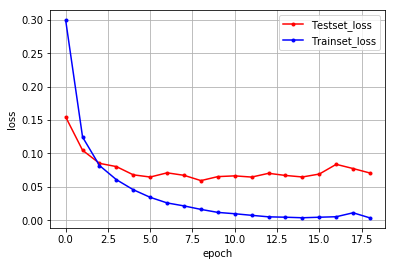

In [16]:
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c= 'blue', label = 'Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')

#plt.axis([0,20,0,0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')    
plt.show()

### 결론: Best Model은 Epoch 16, 정확도는 98.16%